Project Description: Analyzing Online Advertisement Clicks
Objective
The primary objective of this project is to analyze user behavior and identify factors influencing the likelihood of a user clicking on an online advertisement. By understanding these factors, we can improve ad targeting and optimize marketing strategies.

Dataset Description
The dataset contains the following columns:

Daily Time Spent on Site: The amount of time (in minutes) a user spends on the website daily.
Age: The age of the user.
Area Income: The average income of the geographical area where the user resides.
Daily Internet Usage: The amount of time (in minutes) a user spends on the internet daily.
Ad Topic Line: The title or topic line of the advertisement.
City: The city where the user is located.
Male: A binary variable indicating the gender of the user (1 if male, 0 if female).
Country: The country where the user is located.
Timestamp: The exact time and date when the user clicked on the advertisement or visited the site.
Clicked on Ad: A binary variable indicating whether the user clicked on the advertisement (1 if clicked, 0 if not).

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')




Read the Data

In [4]:
data=pd.read_csv(r"C:\Preet\advertising.csv")

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


In [6]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [8]:
data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [9]:
data.shape

(1000, 10)

In [10]:
data.isna().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [11]:
data.duplicated().sum()

0

In [15]:
# Ensure all data types are correct
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

In [16]:
# Encode categorical variables
label_encoder = LabelEncoder()
data['City'] = label_encoder.fit_transform(data['City'])
data['Country'] = label_encoder.fit_transform(data['Country'])


Explortary Data Analysis

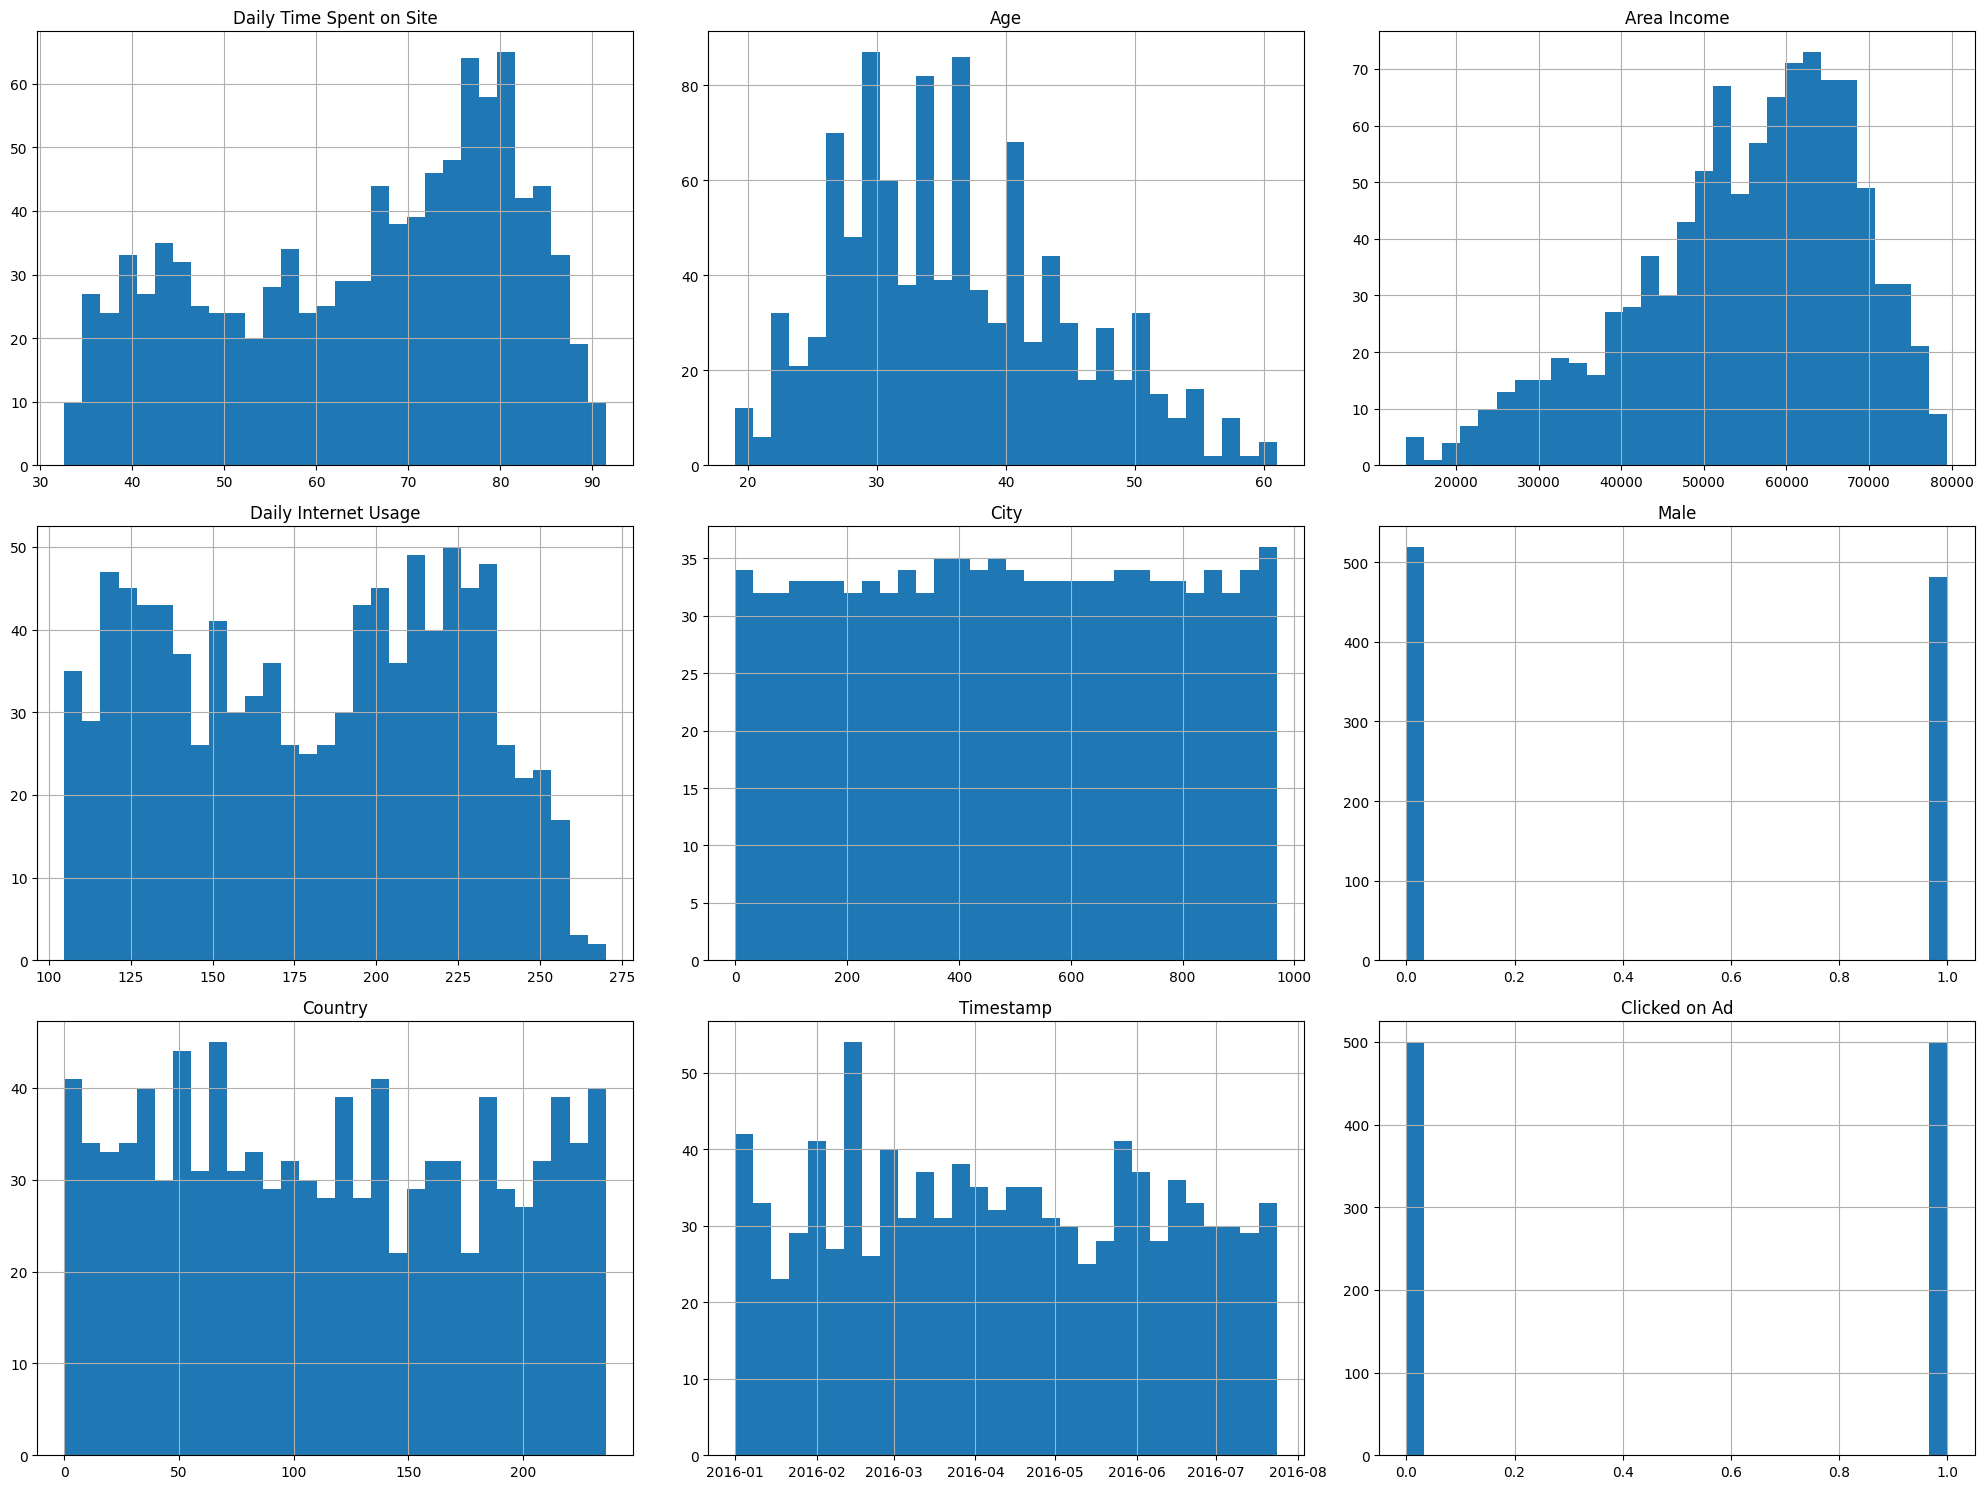

In [17]:
# Visualize the distribution of each feature
data.hist(bins=30, figsize=(20,15))
plt.tight_layout()
plt.show()

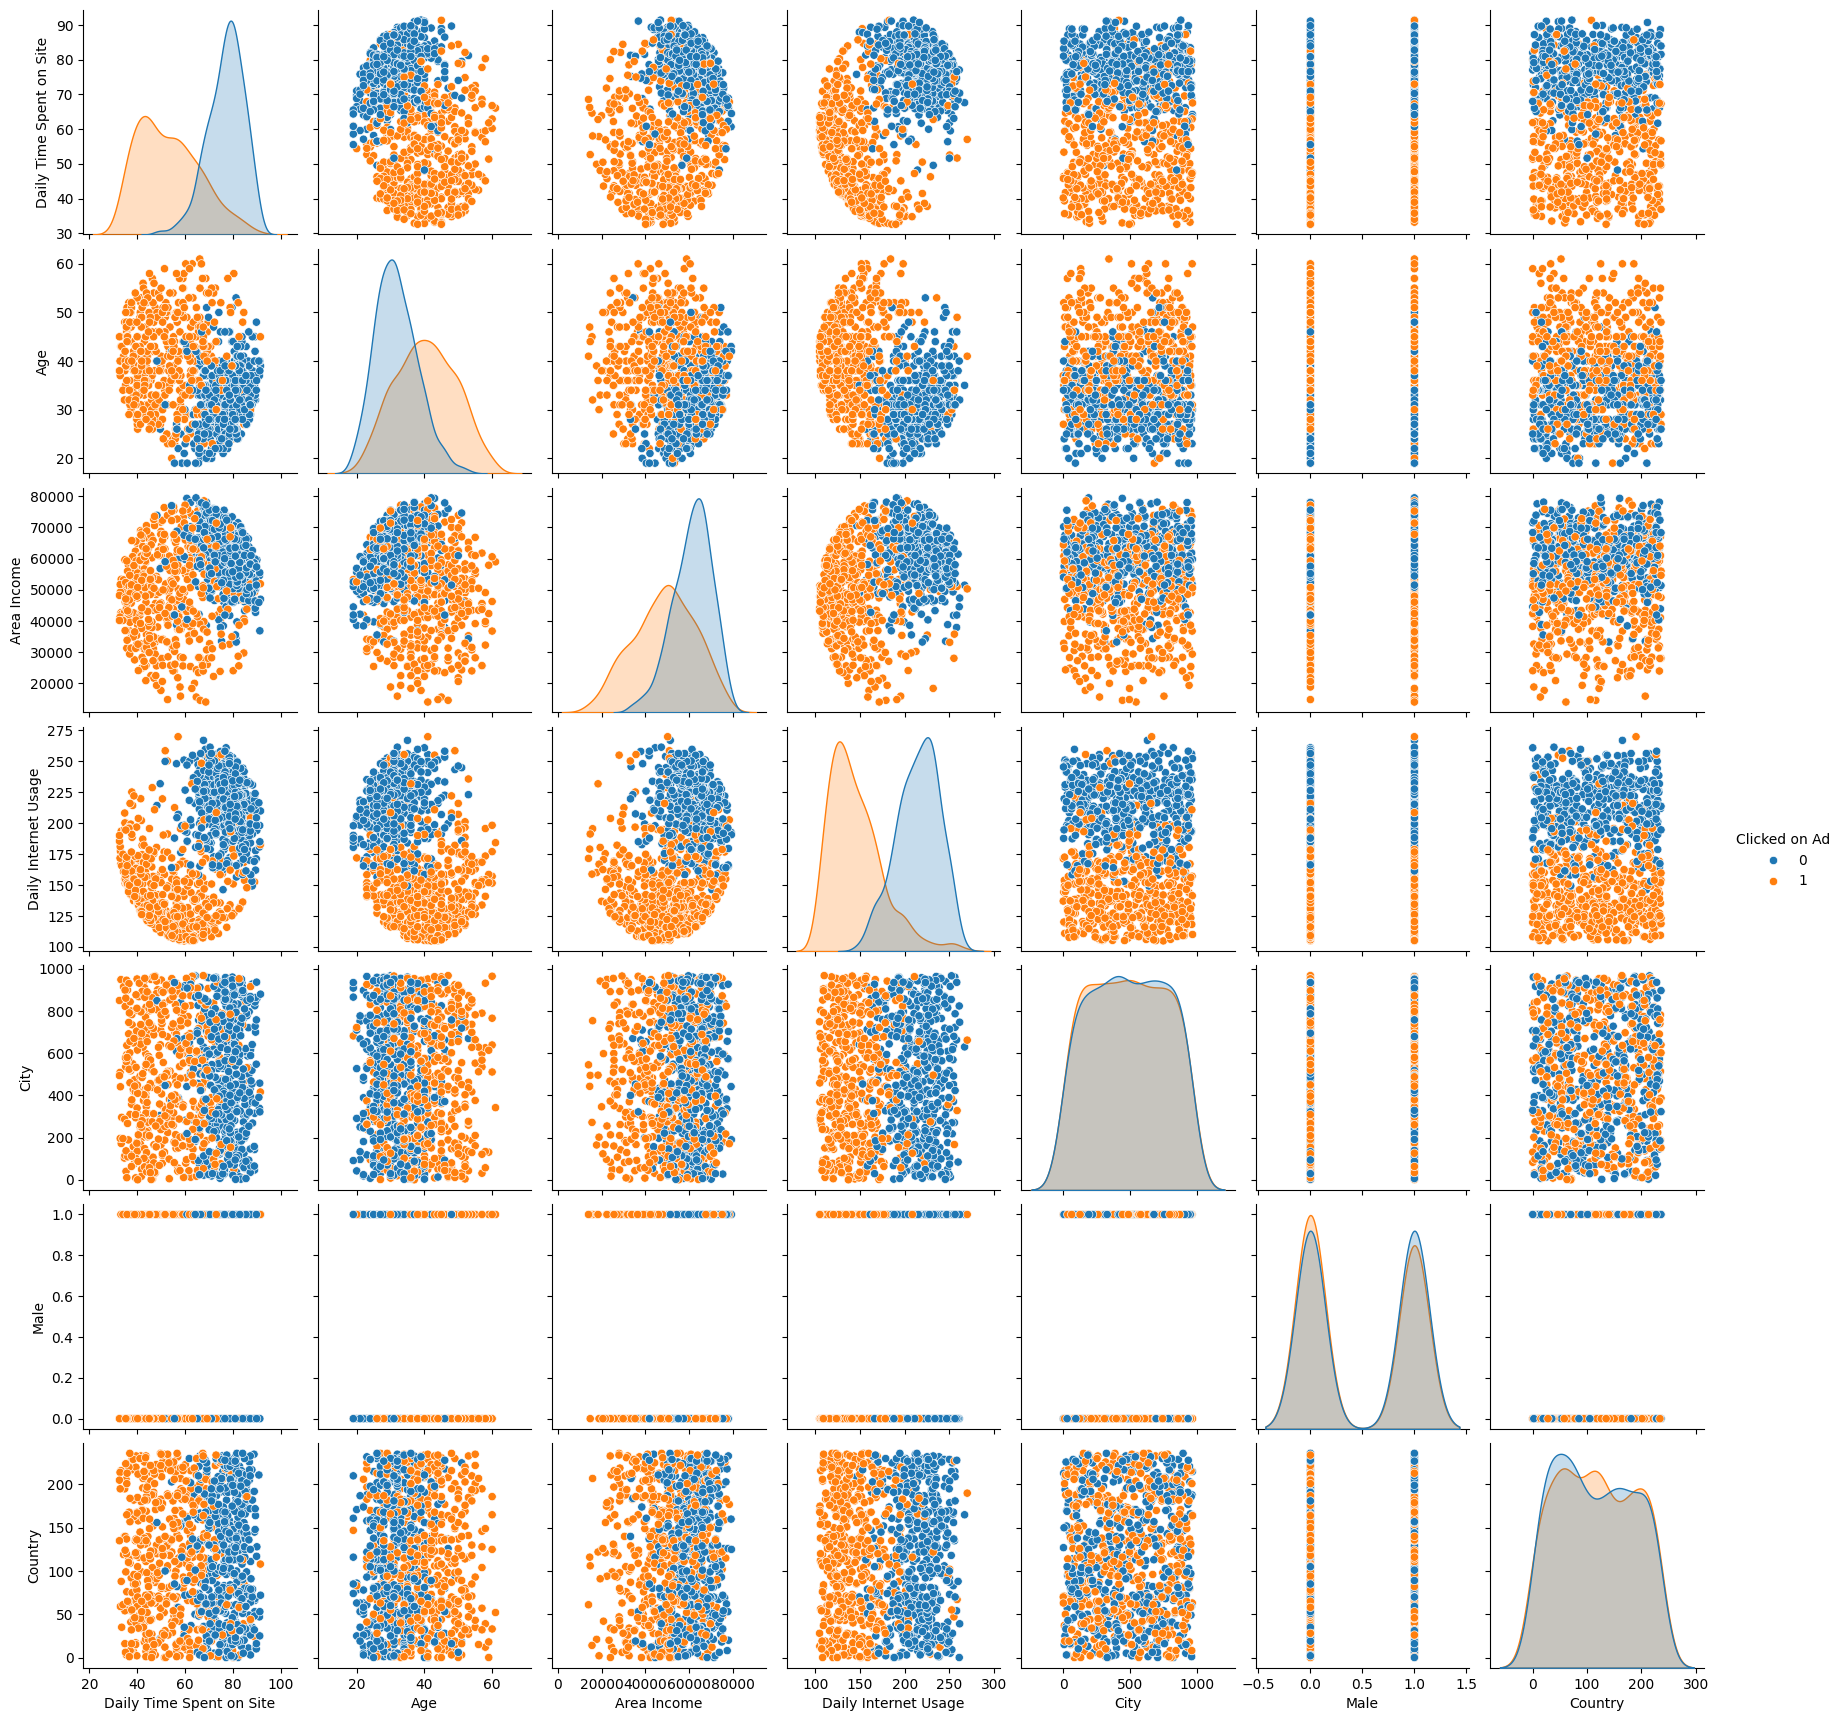

In [18]:
# Analyze the relationship between features and the target variable (Clicked on Ad)
sns.pairplot(data, hue='Clicked on Ad')
plt.show()

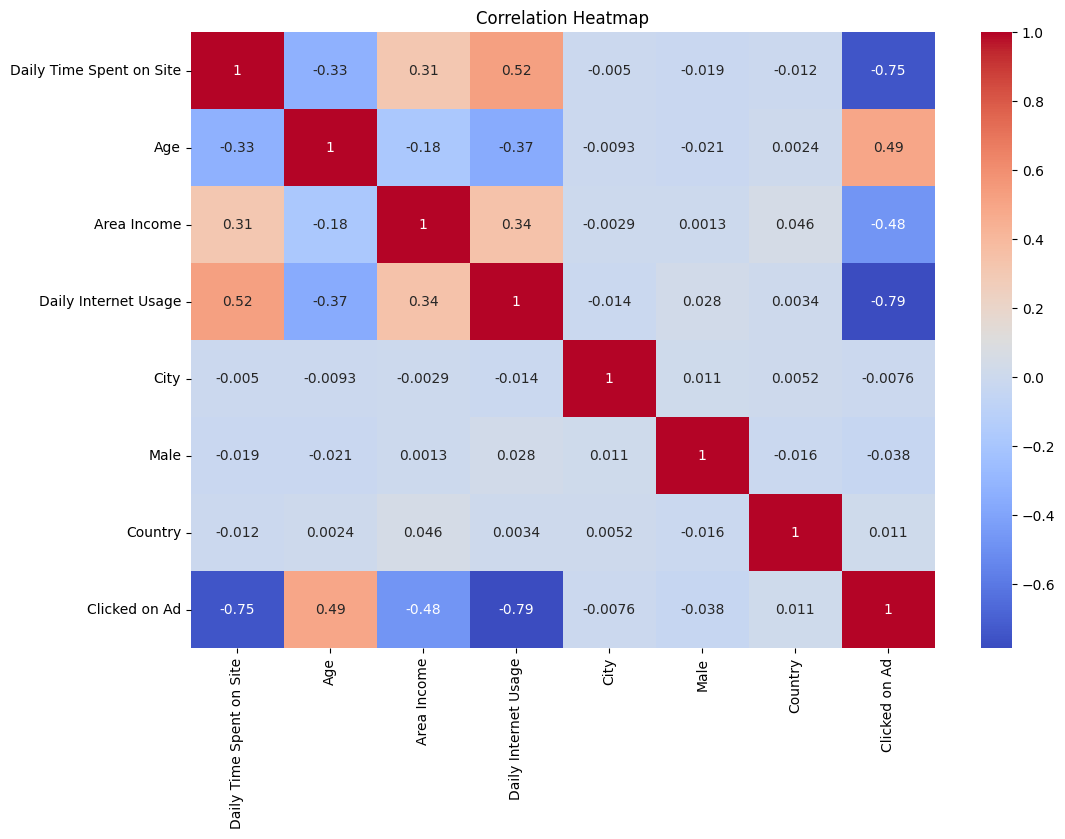

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
numeric_data = data.select_dtypes(include='number')
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


Feature Engineering

In [21]:
# Create new features if necessary (e.g., extract hour from timestamp)
data['Hour'] = data['Timestamp'].dt.hour

# Normalize or standardize numerical features if needed
scaler = StandardScaler()
numerical_features = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Hour']
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Drop the original Timestamp column as we have extracted useful information from it
data = data.drop(columns=['Timestamp', 'Ad Topic Line'])

Modeling

In [23]:
# Split the data into training and testing sets
X = data.drop(columns=['Clicked on Ad'])
y = data['Clicked on Ad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
 #Define the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Train and evaluate the models
results = {}

In [25]:
# Train and evaluate the models
results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[model_name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'AUC-ROC': roc_auc_score(y_test, y_pred)
    }
    print(f'{model_name} Classification Report:\n', classification_report(y_test, y_pred))
    print(f'{model_name} Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       146
           1       0.98      0.96      0.97       154

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300

Logistic Regression Confusion Matrix:
 [[143   3]
 [  6 148]]
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93       146
           1       0.93      0.94      0.94       154

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300

Decision Tree Confusion Matrix:
 [[135  11]
 [  9 145]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.94       146

In [26]:
# Display the results
results_df = pd.DataFrame(results).T
print(results_df)

                     Accuracy  Precision    Recall  F1 Score   AUC-ROC
Logistic Regression  0.970000   0.980132  0.961039  0.970492  0.970246
Decision Tree        0.933333   0.929487  0.941558  0.935484  0.933108
Random Forest        0.943333   0.959732  0.928571  0.943894  0.943738
Gradient Boosting    0.946667   0.953947  0.941558  0.947712  0.946807


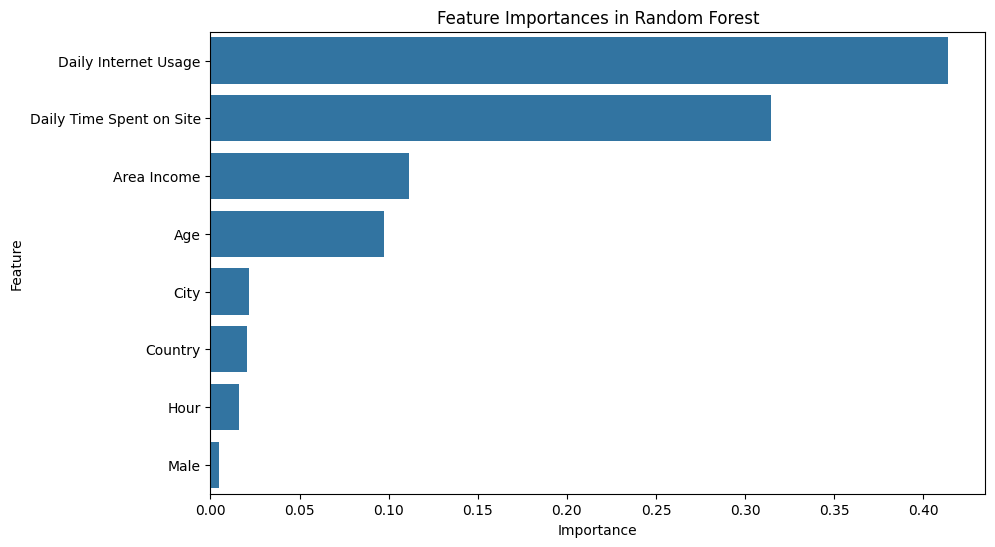

In [27]:
# Identify the most important features influencing ad clicks using Random Forest
best_model = models['Random Forest']
importances = best_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances in Random Forest')
plt.show()


In [28]:
# Based on the findings, provide actionable insights
print("Recommendations:")
print("1. Focus on users with higher 'Daily Time Spent on Site' as they are more likely to click on ads.")
print("2. Target ads to users within specific age ranges identified as more likely to click.")
print("3. Optimize ad content to appeal to users with higher 'Daily Internet Usage'.")
print("4. Use demographic information like 'Area Income' to better tailor advertisements.")

Recommendations:
1. Focus on users with higher 'Daily Time Spent on Site' as they are more likely to click on ads.
2. Target ads to users within specific age ranges identified as more likely to click.
3. Optimize ad content to appeal to users with higher 'Daily Internet Usage'.
4. Use demographic information like 'Area Income' to better tailor advertisements.
